# 1. Инициализация pyspark framework и загрузка данных в pyspark dataframe

In [1]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [2]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()

# Укажите путь к CSV файлу
csv_file_path = "data/1.csv"

# Прочитайте CSV файл в DataFrame
df = spark.read.csv(csv_file_path, header=True, sep=';', inferSchema=True)

# Конвертируйте DataFrame из PySpark в DataFrame в pandas
df_pandas = df.toPandas()

# Теперь df_pandas содержит данные в формате pandas
df_pandas


,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_86,pv_87,pv_88,pv_89,pv_90,pv_91,pv_92,pv_93,pv_94,pv_95
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,81.286349,77.580181,58.433449,55.572970,53.792765,51.999028,43.290921,34.161343,28.349901,24.636241
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,55.571058,53.791009,51.997415,43.289440,34.159983,28.348652,24.635094,19.147728,12.982840,7.928666
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,51.996045,43.288181,34.158827,28.347590,24.634119,19.146832,12.982018,7.927911,5.622566,3.299011
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,43.288060,34.158716,28.347489,24.634026,19.146747,12.981939,7.927839,5.622499,3.298950,2.130662
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,24.633942,19.146670,12.981869,7.927774,5.622440,3.298896,2.130612,1.352937,1.246175,1.246205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46961,2017-01-04 02:00:00,1,38,54.028347,0.000000,53.297704,58.212745,59.049011,59.687952,59.778460,...,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309
46962,2017-01-04 02:15:00,1,38,53.684344,0.000000,57.647345,57.952364,58.294865,58.219958,58.270538,...,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309
46963,2017-01-04 02:45:00,1,38,54.008991,0.000000,55.918118,56.717401,57.255785,57.786789,57.814119,...,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309
46964,2017-01-04 03:15:00,1,38,54.214505,0.000000,55.875541,57.032992,57.409886,56.954600,57.884807,...,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309,-0.665309


In [3]:
# Прочитайте CSV файл в DataFrame
df = spark.read.csv(csv_file_path, header=True, sep=';', inferSchema=True)

col = ['timestamp','site_id','period_id','actual_consumption','actual_pv', 
       'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
       'load_10', 'load_11', 'load_12', 'load_13', 'load_14', 'load_15', 'load_16', 'load_17', 'load_18', 'load_19',
       'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09',
       'pv_10', 'pv_11', 'pv_12', 'pv_13', 'pv_14', 'pv_15', 'pv_16', 'pv_17', 'pv_18', 'pv_19'
      ]

df = df[col]
limited_data_pandas = df.limit(10)
limited_data_pandas.toPandas()

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_10,pv_11,pv_12,pv_13,pv_14,pv_15,pv_16,pv_17,pv_18,pv_19
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,3.443197,3.263787,3.099029,2.947728,2.808784,2.681188,2.564013,2.456409,2.357593,2.266848
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,1.706679,1.669097,1.634584,1.602891,1.573786,1.547058,1.522513,1.499974,1.479275,1.460266
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,0.745077,0.786033,0.823644,0.858184,0.889903,0.919032,0.945781,0.970346,0.992904,1.013620
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,0.707628,0.751643,0.792064,0.829183,0.863271,0.894574,0.923321,0.949721,0.973963,0.996226
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,0.775193,0.813691,0.849044,0.881509,0.911323,0.938702,0.963845,0.986935,1.008138,1.027610
5,2014-07-19 22:45:00,1,0,51.790326,0.000000,51.857548,51.891930,51.912236,52.005984,51.929889,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
6,2014-07-19 23:00:00,1,0,52.460697,0.000000,52.347502,52.285460,52.333257,52.231521,52.220741,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
7,2014-07-19 23:15:00,1,0,51.831117,0.000000,52.024522,52.214861,52.192664,52.226268,52.920358,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
8,2014-07-19 23:45:00,1,0,52.030533,0.000000,52.202840,52.344978,53.099632,52.468551,52.493247,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
9,2014-07-20 00:00:00,1,0,51.754934,0.000000,51.995633,52.805283,52.204891,52.246713,52.270049,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124


# **2. Обзор датасета** <a class="anchor" id="2"></a>

### Типы данных:

In [4]:
print('Data overview')
df.printSchema()
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Data overview
root
 |-- timestamp: timestamp (nullable = true)
 |-- site_id: integer (nullable = true)
 |-- period_id: integer (nullable = true)
 |-- actual_consumption: double (nullable = true)
 |-- actual_pv: double (nullable = true)
 |-- load_00: double (nullable = true)
 |-- load_01: double (nullable = true)
 |-- load_02: double (nullable = true)
 |-- load_03: double (nullable = true)
 |-- load_04: double (nullable = true)
 |-- load_05: double (nullable = true)
 |-- load_06: double (nullable = true)
 |-- load_07: double (nullable = true)
 |-- load_08: double (nullable = true)
 |-- load_09: double (nullable = true)
 |-- load_10: double (nullable = true)
 |-- load_11: double (nullable = true)
 |-- load_12: double (nullable = true)
 |-- load_13: double (nullable = true)
 |-- load_14: double (nullable = true)
 |-- load_15: double (nullable = true)
 |-- load_16: double (nullable = true)
 |-- load_17: double (nullable = true)
 |-- load_18: double (nullable = true)
 |-- load_19: double (n

,Column Name,Data type
0,timestamp,timestamp
1,site_id,int
2,period_id,int
3,actual_consumption,double
4,actual_pv,double
5,load_00,double
6,load_01,double
7,load_02,double
8,load_03,double
9,load_04,double


### Статистические показатели:

In [5]:
# Столбцы
columns = ['site_id','period_id','actual_consumption','actual_pv', 
       'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
       'load_10', 'load_11', 'load_12', 'load_13', 'load_14', 'load_15', 'load_16', 'load_17', 'load_18', 'load_19',
       'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09',
       'pv_10', 'pv_11', 'pv_12', 'pv_13', 'pv_14', 'pv_15', 'pv_16', 'pv_17', 'pv_18', 'pv_19'
      ]

df_to_describe = df[columns]


# Статистика по числовым признакам
numeric_summary = df_to_describe.describe().toPandas().transpose()
numeric_summary


# Рассчитываем квартили для каждой колонки
quantiles = [0.25, 0.5, 0.75]
quantile_results = []

for column in columns:
    quantile_values = df_to_describe.approxQuantile(column, quantiles, 0.01)
    quantile_results.append([column] + quantile_values)

# Преобразуем quantile_results в pandas DataFrame
quantile_df = pd.DataFrame(quantile_results, columns=["Column", "Quantile_25", "Quantile_50", "Quantile_75"])

# Выводим результат
quantile_df

,0,1,2,3,4
summary,count,mean,stddev,min,max
site_id,46966,1.0,0.0,1,1
period_id,46966,24.481369501341398,18.85320996525833,0,58
actual_consumption,46966,68.74620117051937,17.216757143745788,11.154231639848081,186.51349133033932
actual_pv,46966,28.0913346357898,40.85255233086976,0.0,150.65349591249998
load_00,46966,68.7432995523938,17.111040186027132,25.510948650717744,144.38405389379315
load_01,46966,68.74177018579405,17.04610089025693,28.882502173183386,123.16514398332706
load_02,46966,68.74025220608685,17.029909586720468,30.76758595436617,127.02479012291525
load_03,46966,68.73907016694217,17.006835828895554,31.754338032005336,134.44110316308385
load_04,46966,68.7376433247188,17.01163037642673,32.52921192904976,136.48603610161177


,Column,Quantile_25,Quantile_50,Quantile_75
0,site_id,1.000000,1.000000,1.000000
1,period_id,6.000000,23.000000,41.000000
2,actual_consumption,55.411558,58.817559,86.135664
3,actual_pv,0.000000,0.000000,49.117586
4,load_00,55.441886,58.858037,86.270908
5,load_01,55.464346,58.838648,86.282894
6,load_02,55.530244,58.853136,86.289676
7,load_03,55.508673,58.824747,86.248836
8,load_04,55.525513,58.870500,86.234302
9,load_05,55.502760,58.847191,86.251555


## Поиск пропущеных значений

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
import pandas as pd

# Создаем SparkSession
spark = SparkSession.builder.appName("example").getOrCreate()

# Предположим, что df - это ваш DataFrame

# Создаем список с количеством пустых значений в каждой колонке
empty_counts = [count(when(col(c).isNull() | (col(c) == ""), c)).alias("Empty_" + c) for c in df.columns]

# Создаем DataFrame с подсчетом пустых значений
missing_data = df.agg(*empty_counts)

# Преобразуем результат в список строк
result_rows = missing_data.first().asDict()

# Преобразуем результат в Pandas DataFrame
result_df = pd.DataFrame(list(result_rows.items()), columns=["Column", "Count"])

# Выводим результат в виде таблицы
result_df


,Column,Count
0,Empty_timestamp,0
1,Empty_site_id,0
2,Empty_period_id,0
3,Empty_actual_consumption,0
4,Empty_actual_pv,0
5,Empty_load_00,0
6,Empty_load_01,0
7,Empty_load_02,0
8,Empty_load_03,0
9,Empty_load_04,0


## Поиск и устранение выбросов

In [7]:
# Межквартильный размах (IQR): Этот метод использует разницу между верхним и нижним квартилями данных. Выбросами считаются значения, которые находятся за пределами определенного диапазона от Q1 и Q3.

from pyspark.sql.functions import col

def remove_outliers(df, column, threshold=1.5):
    # Рассчитываются квантили
    quantiles = df.approxQuantile(column, [0.25, 0.75], 0.01)
    
    # Определяются верхняя и нижняя границы для удаления выбросов
    lower_bound = quantiles[0] - threshold * (quantiles[1] - quantiles[0])
    upper_bound = quantiles[1] + threshold * (quantiles[1] - quantiles[0])
    
    # Фильтруются и удаляются выбросы
    outliers_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
    df_cleaned = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    
    return df_cleaned, outliers_count

# Список числовых столбцов для проверки на выбросы
numeric_columns = ['actual_consumption', 'actual_pv']

# Словарь для хранения статистики по удаленным выбросам
outliers_stats = {}

# Удаление выбросов для каждого числового столбца
for column in numeric_columns:
    df, outliers_count = remove_outliers(df, column)
    outliers_stats[column] = outliers_count

# Вывод очищенного DataFrame (ограничено 10 строками)
limited_data_pandas = df.limit(10).toPandas()
print(limited_data_pandas)

# Вывод статистики по удаленным выбросам
for column, count in outliers_stats.items():
    print(f"Outliers removed for {column}: {count}")



            timestamp  site_id  period_id  actual_consumption  actual_pv  \
0 2014-07-19 18:45:00        1          0           51.625703  22.712489   
1 2014-07-19 19:30:00        1          0           52.281257   6.618605   
2 2014-07-19 20:00:00        1          0           50.719565   1.452209   
3 2014-07-19 20:15:00        1          0           51.901162   0.580877   
4 2014-07-19 21:00:00        1          0           51.250007   0.000000   
5 2014-07-19 22:45:00        1          0           51.790326   0.000000   
6 2014-07-19 23:00:00        1          0           52.460697   0.000000   
7 2014-07-19 23:15:00        1          0           51.831117   0.000000   
8 2014-07-19 23:45:00        1          0           52.030533   0.000000   
9 2014-07-20 00:00:00        1          0           51.754934   0.000000   

     load_00    load_01    load_02    load_03    load_04  ...     pv_10  \
0  52.816828  53.501688  54.079161  52.683472  52.590445  ...  3.443197   
1  51.452796 

In [8]:
# from pyspark.sql.functions import col

# def remove_outliers_z_score(df, column, threshold=3):
#     # Рассчитываются среднее и стандартное отклонение
#     mean_val = df.agg({column: 'mean'}).collect()[0][0]
#     std_dev = df.agg({column: 'stddev'}).collect()[0][0]
    
#     # Определяются верхняя и нижняя границы для удаления выбросов
#     lower_bound = mean_val - threshold * std_dev
#     upper_bound = mean_val + threshold * std_dev
    
#     # Фильтруются и удаляются выбросы
#     outliers_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
#     df_cleaned = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    
#     return df_cleaned, outliers_count

# # Список числовых столбцов для проверки на выбросы
# numeric_columns = ['actual_consumption', 'actual_pv']

# # Словарь для хранения статистики по удаленным выбросам
# outliers_stats = {}

# # Удаление выбросов для каждого числового столбца с использованием z-оценки
# for column in numeric_columns:
#     df, outliers_count = remove_outliers_z_score(df, column)
#     outliers_stats[column] = outliers_count

# # Вывод очищенного DataFrame (ограничено 10 строками)
# limited_data_pandas = df.limit(10).toPandas()
# print(limited_data_pandas)

# # Вывод статистики по удаленным выбросам
# for column, count in outliers_stats.items():
#     print(f"Outliers removed for {column}: {count}")


## Визуализация распределения

### actual_consumption

<Axes: xlabel='actual_consumption', ylabel='Count'>

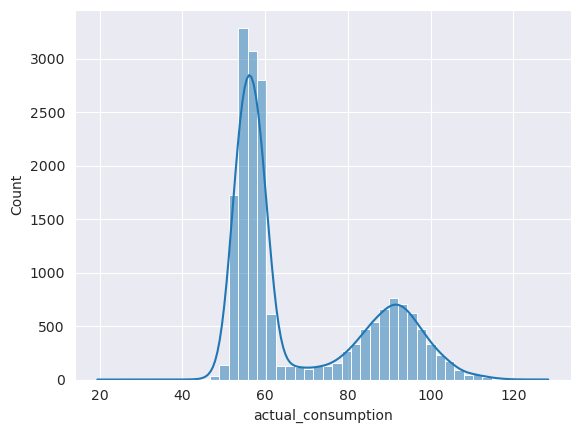

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Установка стиля "darkgrid"
sns.set_style('darkgrid')

# Создание гистограммы и KDE для признака 'actual_consumption' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_consumption', kde=True)
plt.show()

## actual_pv

<Axes: xlabel='actual_pv', ylabel='Count'>

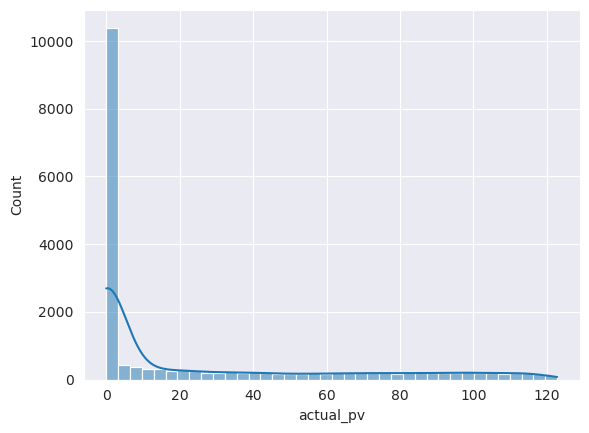

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Установка стиля "darkgrid"
sns.set_style('darkgrid')

# Создание гистограммы и KDE для признака 'actual_pv' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_pv', kde=True)  # Используйте 'viridis' или другую палитру
plt.show()

## load_00

<Axes: xlabel='load_00', ylabel='Count'>

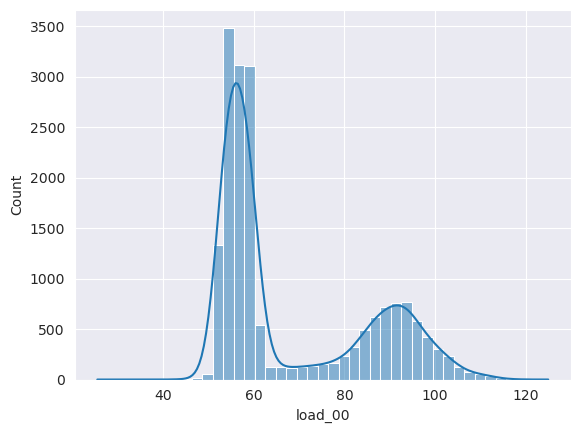

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Установка стиля "darkgrid"
sns.set_style('darkgrid')

# Создание гистограммы и KDE для признака 'actual_pv' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='load_00', kde=True)  # Используйте 'viridis' или другую палитру
plt.show()

## pv_00

<Axes: xlabel='pv_00', ylabel='Count'>

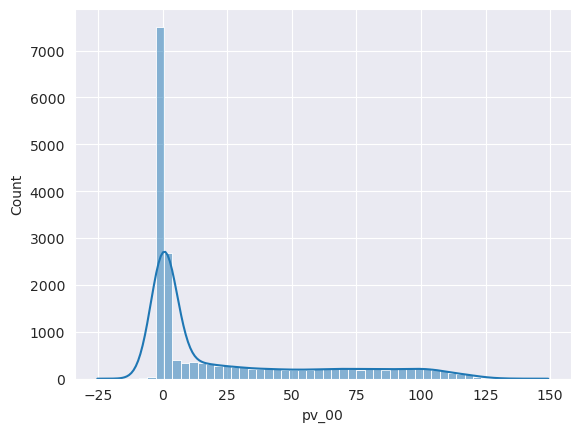

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Установка стиля "darkgrid"
sns.set_style('darkgrid')

# Создание гистограммы и KDE для признака 'actual_pv' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='pv_00', kde=True)  # Используйте 'viridis' или другую палитру
plt.show()

## Корреляция между actual_consumption и load_00 - load_19

In [26]:
from pyspark.sql import functions as F

# Выберите только нужные колонки из датафрейма
selected_columns = ['actual_consumption'] + [f'load_{i:02}' for i in range(20)]
data_subset = df.select(selected_columns)

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [('actual_consumption', f'load_{i:02}') for i in range(20)]

# Создайте словарь для хранения результатов корреляции
correlation_dict = {}

# Вычислите корреляцию для каждой пары столбцов и добавьте в словарь
for col1, col2 in column_pairs:
    correlation = data_subset.agg(F.corr(col1, col2).alias('correlation')).collect()[0]['correlation']
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")

Correlation between actual_consumption and load_00: 0.9867331537873903
Correlation between actual_consumption and load_01: 0.9729470931214971
Correlation between actual_consumption and load_02: 0.9503086509617269
Correlation between actual_consumption and load_03: 0.9300566760159658
Correlation between actual_consumption and load_04: 0.9010421056603694
Correlation between actual_consumption and load_05: 0.8745396693793694
Correlation between actual_consumption and load_06: 0.8413663570178047
Correlation between actual_consumption and load_07: 0.811552912240637
Correlation between actual_consumption and load_08: 0.7762678493648153
Correlation between actual_consumption and load_09: 0.7446905662278626
Correlation between actual_consumption and load_10: 0.7085037448954877
Correlation between actual_consumption and load_11: 0.6766405055061097
Correlation between actual_consumption and load_12: 0.6403121503329654
Correlation between actual_consumption and load_13: 0.6086324443697425
Correla

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Column Pairs')

Text(0, 0.5, 'Correlation')

Text(0.5, 1.0, 'Correlation between Column Pairs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'actual_consumption - load_00'),
  Text(1, 0, 'actual_consumption - load_01'),
  Text(2, 0, 'actual_consumption - load_02'),
  Text(3, 0, 'actual_consumption - load_03'),
  Text(4, 0, 'actual_consumption - load_04'),
  Text(5, 0, 'actual_consumption - load_05'),
  Text(6, 0, 'actual_consumption - load_06'),
  Text(7, 0, 'actual_consumption - load_07'),
  Text(8, 0, 'actual_consumption - load_08'),
  Text(9, 0, 'actual_consumption - load_09'),
  Text(10, 0, 'actual_consumption - load_10'),
  Text(11, 0, 'actual_consumption - load_11'),
  Text(12, 0, 'actual_consumption - load_12'),
  Text(13, 0, 'actual_consumption - load_13'),
  Text(14, 0, 'actual_consumption - load_14'),
  Text(15, 0, 'actual_consumption - load_15'),
  Text(16, 0, 'actual_consumption - load_16'),
  Text(17, 0, 'actual_consumption - load_17'),
  Text(18, 0, 'actual_consumption - load_18'),
  Text(19, 0, 'actual_consumption - load_19'

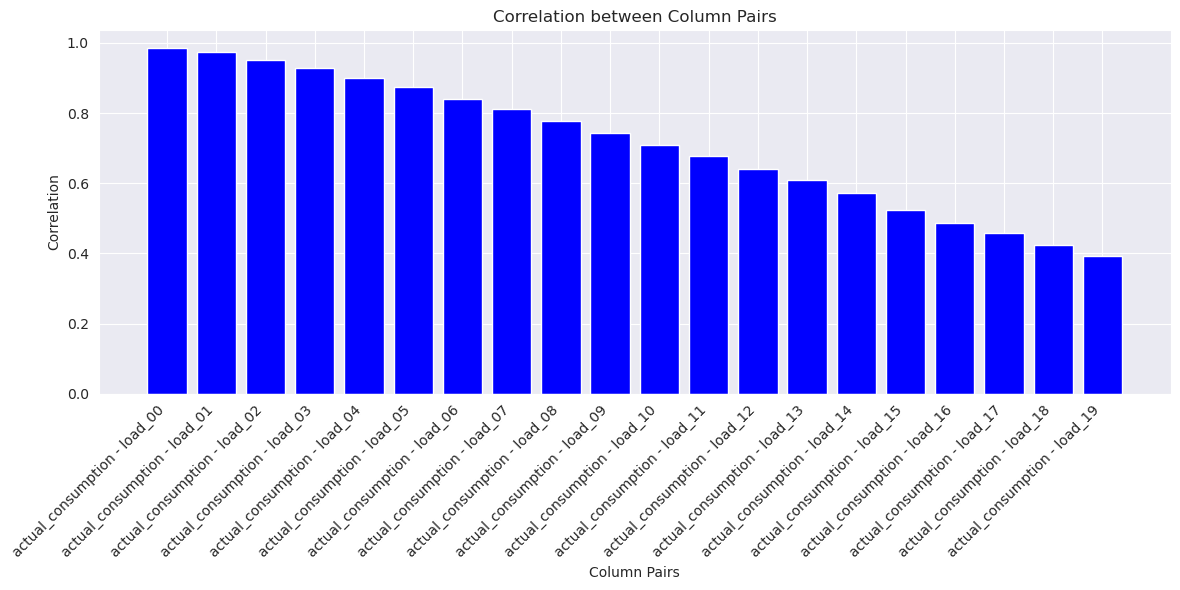

In [28]:
import matplotlib.pyplot as plt

# Создайте списки для столбцов и соответствующих корреляций
columns = []
correlations = []

# Заполните списки
for (col1, col2), correlation in correlation_dict.items():
    columns.append(f"{col1} - {col2}")
    correlations.append(correlation)

# Постройте столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(columns, correlations, color='blue')
plt.xlabel('Column Pairs')
plt.ylabel('Correlation')
plt.title('Correlation between Column Pairs')
plt.xticks(rotation=45, ha='right')  # Повернуть названия столбцов для лучшей читаемости
plt.tight_layout()
plt.show()

## Корреляция между actual_pv и pv_00 - pv_19

In [29]:
from pyspark.sql import functions as F

# Выберите только нужные колонки из датафрейма
selected_columns = ['actual_pv'] + [f'pv_{i:02}' for i in range(20)]
data_subset = df.select(selected_columns)

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [('actual_pv', f'pv_{i:02}') for i in range(20)]

# Создайте словарь для хранения результатов корреляции
correlation_dict = {}

# Вычислите корреляцию для каждой пары столбцов и добавьте в словарь
for col1, col2 in column_pairs:
    correlation = data_subset.agg(F.corr(col1, col2).alias('correlation')).collect()[0]['correlation']
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")

Correlation between actual_pv and pv_00: 0.9826738669846746
Correlation between actual_pv and pv_01: 0.9560223007718254
Correlation between actual_pv and pv_02: 0.9287583537634801
Correlation between actual_pv and pv_03: 0.8963970139426335
Correlation between actual_pv and pv_04: 0.8590549888192033
Correlation between actual_pv and pv_05: 0.8175620431818177
Correlation between actual_pv and pv_06: 0.7728289649606195
Correlation between actual_pv and pv_07: 0.7251642294992081
Correlation between actual_pv and pv_08: 0.6751435695887206
Correlation between actual_pv and pv_09: 0.6233313743247426
Correlation between actual_pv and pv_10: 0.5707132028893109
Correlation between actual_pv and pv_11: 0.5173544311585409
Correlation between actual_pv and pv_12: 0.46419456877289916
Correlation between actual_pv and pv_13: 0.41146600293286106
Correlation between actual_pv and pv_14: 0.3592985107612921
Correlation between actual_pv and pv_15: 0.30807610015033826
Correlation between actual_pv and pv_

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Column Pairs')

Text(0, 0.5, 'Correlation')

Text(0.5, 1.0, 'Correlation between Column Pairs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'actual_pv - pv_00'),
  Text(1, 0, 'actual_pv - pv_01'),
  Text(2, 0, 'actual_pv - pv_02'),
  Text(3, 0, 'actual_pv - pv_03'),
  Text(4, 0, 'actual_pv - pv_04'),
  Text(5, 0, 'actual_pv - pv_05'),
  Text(6, 0, 'actual_pv - pv_06'),
  Text(7, 0, 'actual_pv - pv_07'),
  Text(8, 0, 'actual_pv - pv_08'),
  Text(9, 0, 'actual_pv - pv_09'),
  Text(10, 0, 'actual_pv - pv_10'),
  Text(11, 0, 'actual_pv - pv_11'),
  Text(12, 0, 'actual_pv - pv_12'),
  Text(13, 0, 'actual_pv - pv_13'),
  Text(14, 0, 'actual_pv - pv_14'),
  Text(15, 0, 'actual_pv - pv_15'),
  Text(16, 0, 'actual_pv - pv_16'),
  Text(17, 0, 'actual_pv - pv_17'),
  Text(18, 0, 'actual_pv - pv_18'),
  Text(19, 0, 'actual_pv - pv_19')])

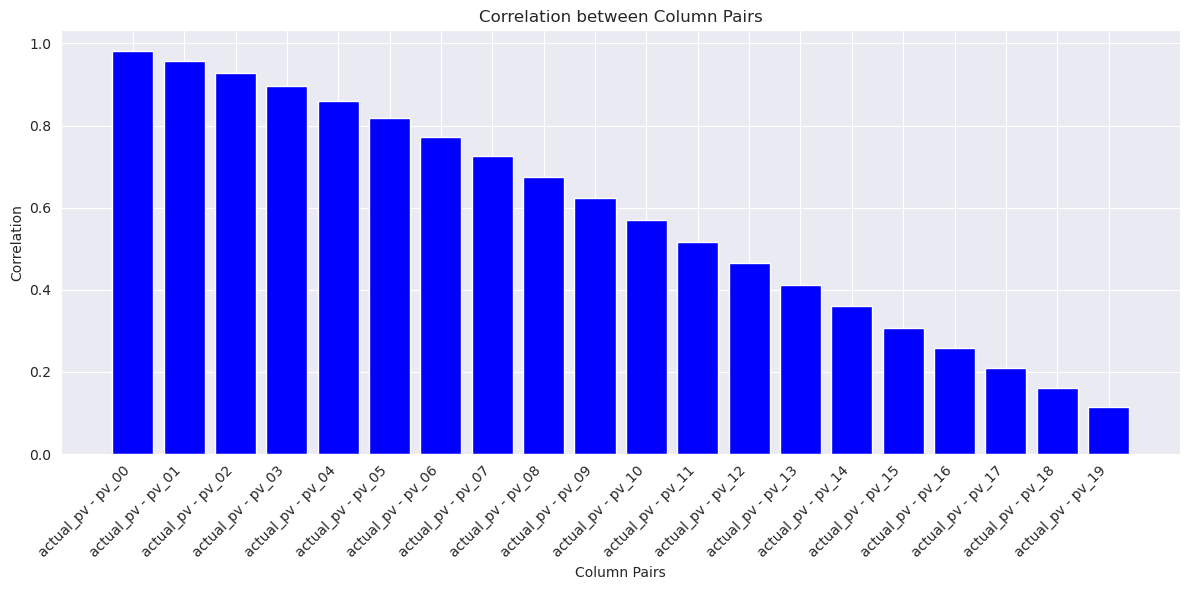

In [30]:
import matplotlib.pyplot as plt

# Создайте списки для столбцов и соответствующих корреляций
columns = []
correlations = []

# Заполните списки
for (col1, col2), correlation in correlation_dict.items():
    columns.append(f"{col1} - {col2}")
    correlations.append(correlation)

# Постройте столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(columns, correlations, color='blue')
plt.xlabel('Column Pairs')
plt.ylabel('Correlation')
plt.title('Correlation between Column Pairs')
plt.xticks(rotation=45, ha='right')  # Повернуть названия столбцов для лучшей читаемости
plt.tight_layout()
plt.show()

## Выводы

### В рамках лабораторной работы был проведён разведочный анализ данных с использованием PySpark для датасета исторических данных по фотоэлектричеству и нагрузке. Была проделана следующая работа:

- Определены типы признаков в датасете.
- Обнаружены и устранены пропущенные значения в датасете.
- Выявлены и устранены выбросы в датасете.
- Рассчитаны статистические показатели признаков.
- Визуализированы распределения наиболее важных пр
- Определена корреляция между признакамизнаками.
знаками